# Liver Disease Prediction

In [2]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df=pd.read_csv('liver.csv')


In [4]:
df.shape

(564, 11)

In [5]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

Filtering categorical data

In [7]:
df.dtypes[df.dtypes=='object']

Series([], dtype: object)

## Distribution of Numerical Features

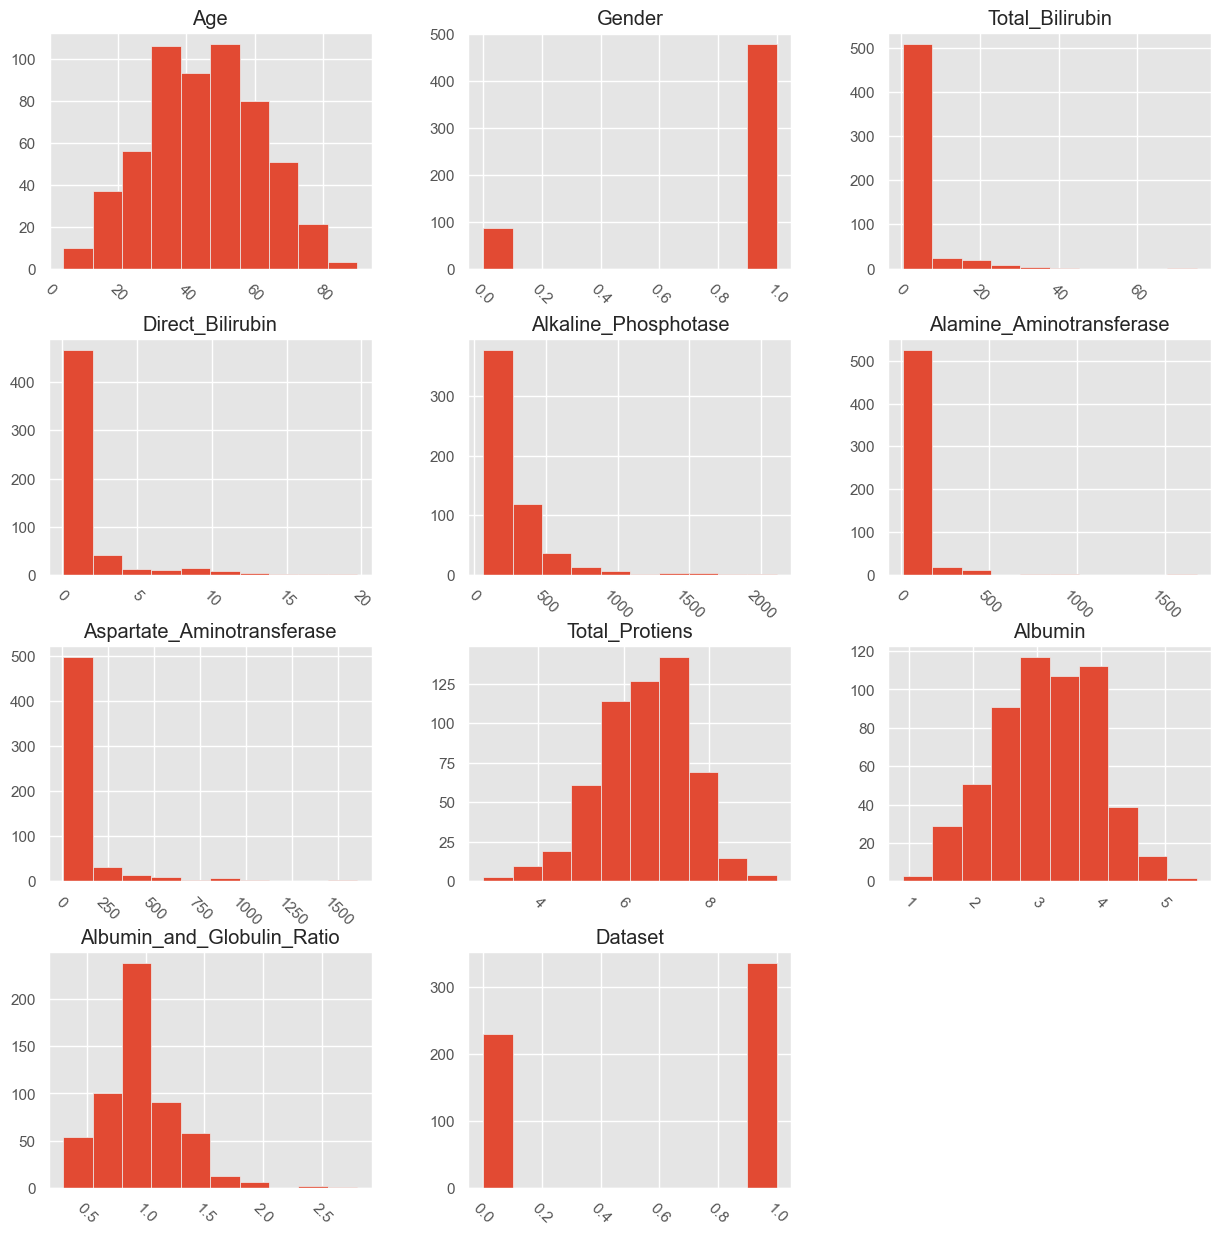

In [8]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [9]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,44.872340,0.847518,3.308156,1.490248,291.292553,74.664894,96.319149,6.495390,3.146631,0.948174,0.593972
std,16.270406,0.359807,6.276478,2.834354,243.913762,155.725254,172.489836,1.088718,0.796511,0.319301,0.491526
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.000000,86.250000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [10]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 0

df['Dataset'] = df['Dataset'].map(partition)

## Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Gender'>

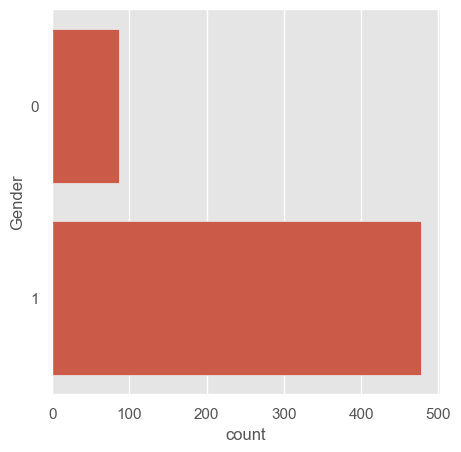

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [12]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender


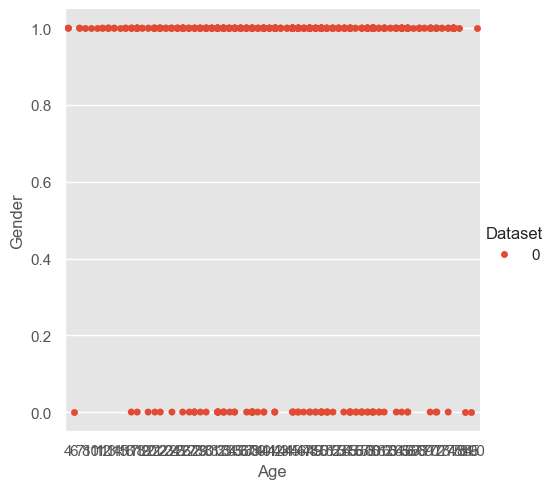

In [13]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df, kind="strip")  # or kind="swarm", "box", "violin", etc.
plt.show()

Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  478
Number of patients that are female:  86


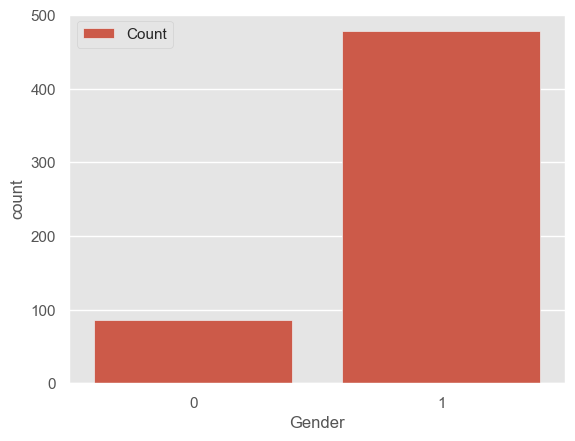

In [14]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [15]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

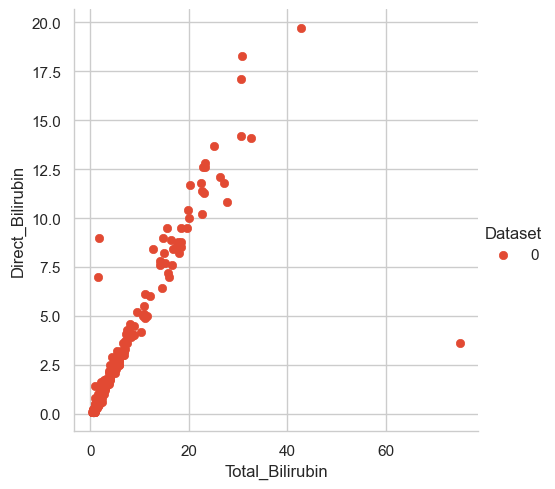

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')  # Background grid

# Fix: Replace 'size' with 'height'
sns.FacetGrid(df, hue='Dataset', height=5) \
    .map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin') \
    .add_legend()

plt.show()


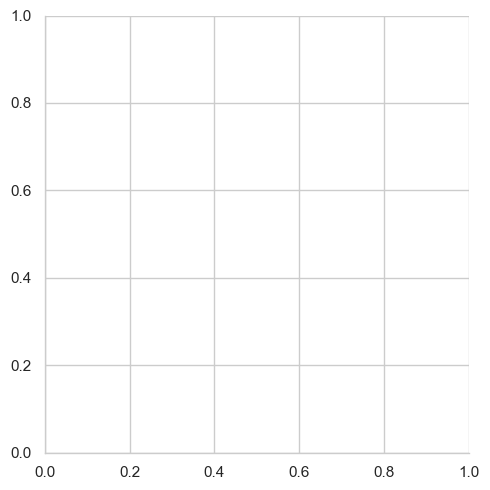

In [17]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue='Dataset', height=5)


## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [18]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,NaN,0.009933,0.005304,0.072760,-0.098949,-0.070804,-0.198521,-0.267788,-0.212235,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bilirubin,0.009933,NaN,1.000000,0.873053,0.201557,0.204973,0.298168,-0.007566,-0.223323,-0.208794,NaN
Direct_Bilirubin,0.005304,NaN,0.873053,1.000000,0.229584,0.222689,0.318630,0.000221,-0.229990,-0.202596,NaN
Alkaline_Phosphotase,0.072760,NaN,0.201557,0.229584,1.000000,0.112893,0.130323,-0.032214,-0.162382,-0.230160,NaN
Alamine_Aminotransferase,-0.098949,NaN,0.204973,0.222689,0.112893,1.000000,0.835956,-0.031323,-0.023225,-0.013063,NaN
Aspartate_Aminotransferase,-0.070804,NaN,0.298168,0.318630,0.130323,0.835956,1.000000,-0.039171,-0.102989,-0.086434,NaN
Total_Protiens,-0.198521,NaN,-0.007566,0.000221,-0.032214,-0.031323,-0.039171,1.000000,0.785980,0.237980,NaN
Albumin,-0.267788,NaN,-0.223323,-0.229990,-0.162382,-0.023225,-0.102989,0.785980,1.000000,0.687226,NaN
Albumin_and_Globulin_Ratio,-0.212235,NaN,-0.208794,-0.202596,-0.230160,-0.013063,-0.086434,0.237980,0.687226,1.000000,NaN


<Axes: >

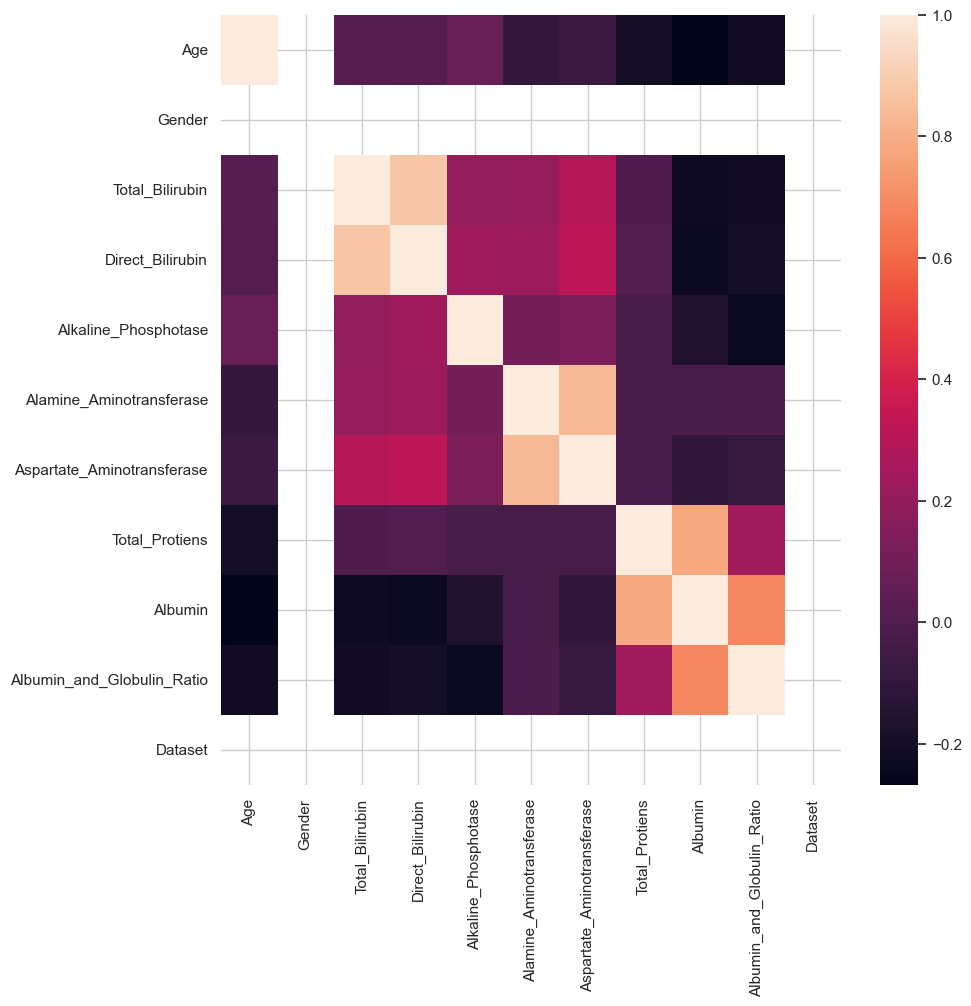

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

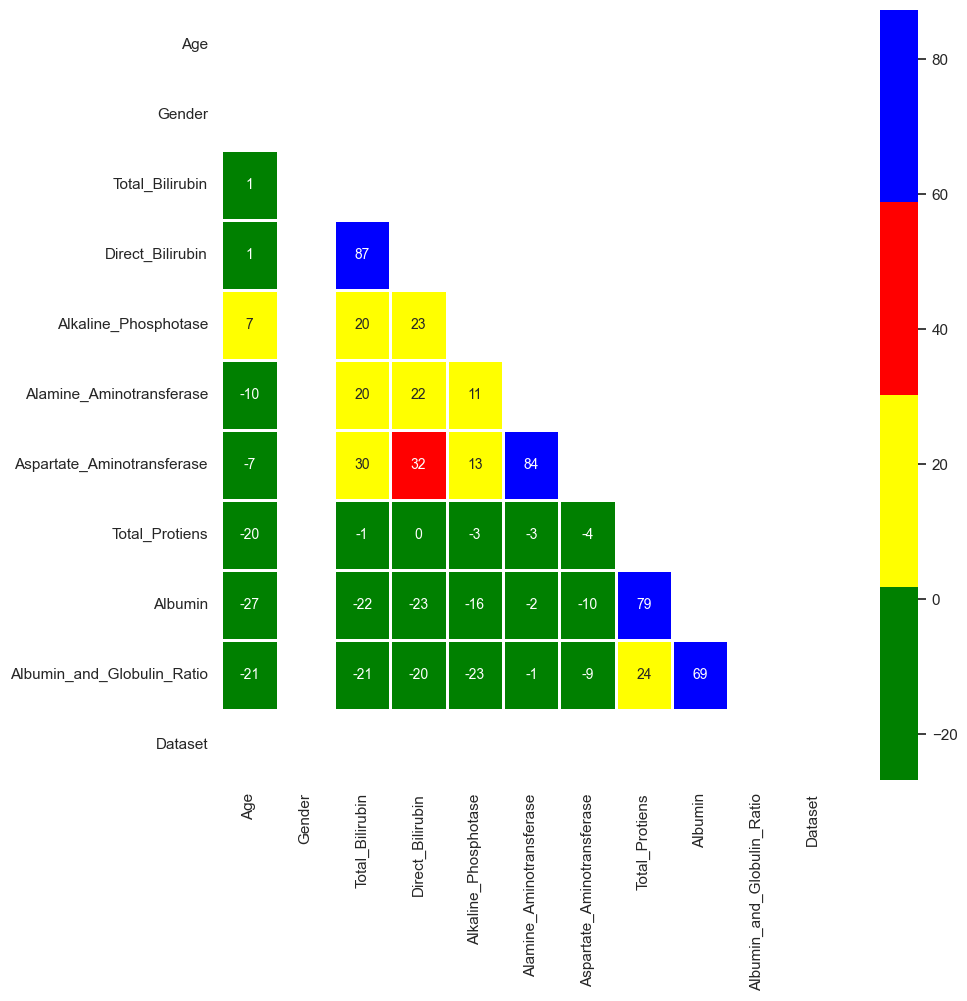

In [20]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [21]:
df = df.drop_duplicates()
print( df.shape )

(564, 11)


There were 13 duplicates

## Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

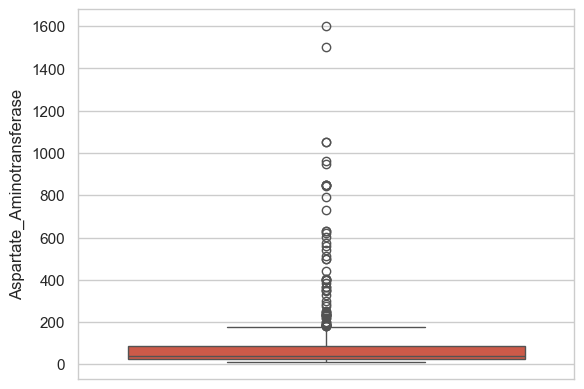

In [22]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [23]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

110    1600
192    1500
185    1050
111    1050
44      960
Name: Aspartate_Aminotransferase, dtype: int64

In [24]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(564, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

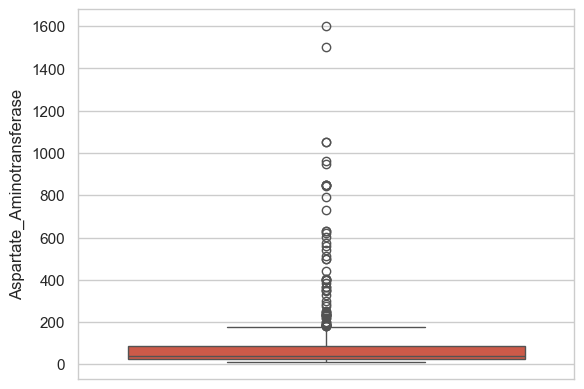

In [25]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [26]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

110    1600
192    1500
185    1050
111    1050
44      960
Name: Aspartate_Aminotransferase, dtype: int64

In [27]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(564, 11)

In [28]:
df.isnull().values.any()

np.False_

In [29]:
df=df.dropna(how='any')  

In [30]:
df.shape

(564, 11)

In [31]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [32]:
df = pd.read_csv("liver.csv")
print(df["Dataset"].value_counts())  # Check class balance


Dataset
1    335
0    229
Name: count, dtype: int64


## Machine Learning Models

### Data Preparation

In [33]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [35]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

import numpy as np

print("Unique classes in y_train:", np.unique(y_train, return_counts=True))
print("Unique classes in y_test:", np.unique(y_test, return_counts=True))


(451, 10) (113, 10) (451,) (113,)
Unique classes in y_train: (array([0, 1]), array([183, 268]))
Unique classes in y_test: (array([0, 1]), array([46, 67]))


### Data standardization

In [36]:
train_mean = X_train.mean()
train_std = X_train.std()

In [37]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [38]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,1.536096e-16,5.908060e-17,-3.938707e-17,3.938707e-17,3.938707e-17,-3.544836e-17,3.150966e-17,-6.085302e-16,-1.378547e-16,-1.181612e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.402244e+00,-2.412550e+00,-5.164537e-01,-4.942135e-01,-9.612471e-01,-3.980141e-01,-4.822385e-01,-3.405455e+00,-2.808860e+00,-2.125247e+00
25%,-7.908538e-01,4.135801e-01,-4.430351e-01,-4.583329e-01,-4.707450e-01,-3.214589e-01,-4.001174e-01,-6.095383e-01,-6.598200e-01,-7.791055e-01
50%,1.484139e-02,4.135801e-01,-4.063258e-01,-4.224523e-01,-3.315195e-01,-2.507925e-01,-3.179963e-01,1.119887e-01,-2.774944e-02,-1.060348e-01
75%,7.585601e-01,4.135801e-01,-9.429656e-02,-6.364630e-02,3.475056e-02,-1.006265e-01,-6.889555e-02,6.531339e-01,7.307353e-01,5.670360e-01
max,2.803786e+00,4.135801e-01,5.393747e+00,6.036056e+00,6.891070e+00,9.436390e+00,8.222599e+00,2.817715e+00,3.006189e+00,5.278531e+00


In [39]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [40]:
print(set(y_train))  # or
print(y_train.unique())  # if it's a pandas Series


{0, 1}
[1 0]


In [41]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.034586,-0.086620,0.086489,0.023039,0.083484,-0.085904,-0.048232,0.088044,0.155719,0.279939
std,1.045277,1.083429,1.627108,1.086597,1.210276,0.451190,0.680453,0.906969,1.029074,1.312727
min,-2.526197,-2.412550,-0.498099,-0.494214,-0.811312,-0.386236,-0.460340,-2.413356,-2.176789,-1.889672
25%,-0.480971,0.413580,-0.461390,-0.458333,-0.485739,-0.315570,-0.400117,-0.519347,-0.533406,-0.610838
50%,0.076818,0.413580,-0.406326,-0.422452,-0.365790,-0.244904,-0.274198,0.111989,0.098665,0.230501
75%,0.944490,0.413580,-0.186070,-0.171288,0.191111,-0.103571,-0.055209,0.743325,0.983563,0.567036
max,1.874138,0.413580,13.176123,6.538384,7.807816,1.969309,4.116544,1.735424,2.247705,6.288137


# SVM

In [42]:
print(y.value_counts())  # To check class distribution before splitting

# Apply more relaxed conditions for introducing 0s
df.loc[
    (df["Total_Bilirubin"] <= 2.5) &
    (df["Direct_Bilirubin"] <= 0.6) &
    (df["Alkaline_Phosphotase"] <= 250) &
    (df["Alamine_Aminotransferase"] <= 60) &
    (df["Aspartate_Aminotransferase"] <= 60), 
    "Dataset"
] = 0

# Check the new class distribution
df["Dataset"].value_counts()


Dataset
1    335
0    229
Name: count, dtype: int64


Dataset
1    335
0    229
Name: count, dtype: int64

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}
print("Unique classes in y_train:", len(set(y_train)))
print("Values in y_train:", y_train)

from sklearn.model_selection import train_test_split
print("Unique classes in full y:", len(set(y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)
# best parameters

grid_search.best_params_
# best score 

grid_search.best_score_
svc = SVC(C = 0.01, gamma = 0.0001, probability=True)
svc.fit(X_train, y_train)
# model predictions 

y_pred = svc.predict(X_test)
# accuracy score



Unique classes in y_train: 2
Values in y_train: 192    1
162    1
365    1
148    1
345    0
      ..
506    0
57     0
264    0
321    0
107    1
Name: Dataset, Length: 451, dtype: int64
Unique classes in full y: 2


In [44]:
print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
# confusion matrix

print(confusion_matrix(y_test, y_pred))
# classification report

print(classification_report(y_test, y_pred))

0.6607538802660754
0.6283185840707964
[[ 4 42]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        46
           1       0.61      1.00      0.76        67

    accuracy                           0.63       113
   macro avg       0.81      0.54      0.46       113
weighted avg       0.77      0.63      0.52       113



# LR

In [45]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
# model predictions

y_pred = lr.predict(X_test)

In [47]:
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.926829268292683
0.9292035398230089


In [48]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[45  1]
 [ 7 60]]


In [49]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        46
           1       0.98      0.90      0.94        67

    accuracy                           0.93       113
   macro avg       0.92      0.94      0.93       113
weighted avg       0.94      0.93      0.93       113



# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
# model predictions 

y_pred = knn.predict(X_test)

In [52]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9334811529933481
0.9026548672566371


In [53]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[45  1]
 [10 57]]


In [54]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        46
           1       0.98      0.85      0.91        67

    accuracy                           0.90       113
   macro avg       0.90      0.91      0.90       113
weighted avg       0.92      0.90      0.90       113



# DT

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9734513274336283 

Confusion Matrix :- 
[[45  1]
 [ 2 65]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       0.98      0.97      0.98        67

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



In [56]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [57]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'best'}
0.9798976608187134


In [58]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.991130820399113
Test Accuracy of Decision Tree Classifier is 0.9557522123893806 

Confusion Matrix :- 
[[45  1]
 [ 4 63]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.98      0.94      0.96        67

    accuracy                           0.96       113
   macro avg       0.95      0.96      0.95       113
weighted avg       0.96      0.96      0.96       113



# RF

In [59]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion='entropy', max_depth=16, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=130)

rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       n_estimators=130)

In [60]:
y_pred = rand_clf.predict(X_test)

In [61]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

1.0
0.9911504424778761


In [62]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[46  0]
 [ 1 66]]


In [63]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        67

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



# Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [65]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [66]:
# best score

grid_search_gbc.best_score_

np.float64(0.9977272727272727)

In [67]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [68]:
y_pred = gbc.predict(X_test)

In [69]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

1.0
0.9911504424778761


In [70]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[46  0]
 [ 1 66]]


In [71]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        67

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



# XGBoost

In [72]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 300)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
y_pred = xgb.predict(X_test)

In [74]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

1.0
1.0


In [75]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[46  0]
 [ 0 67]]


In [76]:
# classification report

print(classification_report(y_test, y_pred))
import pickle

# Assuming 'best_model' is your highest-performing model
model_path = "models/liver.pkl"

with open(model_path, "wb") as file:
    pickle.dump(xgb, file)

print(f"Model saved at {model_path}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        67

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

Model saved at models/liver.pkl


# Model Comparison

In [77]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,XgBoost,100.00
4,Random Forest Classifier,99.12
5,Gradient Boosting Classifier,99.12
3,Decision Tree Classifier,95.58
0,Logistic Regression,92.92
1,KNN,90.27
2,SVM,62.83


In [78]:
import pickle
model = svc
pickle.dump(model, open("models/liver.pkl",'wb'))

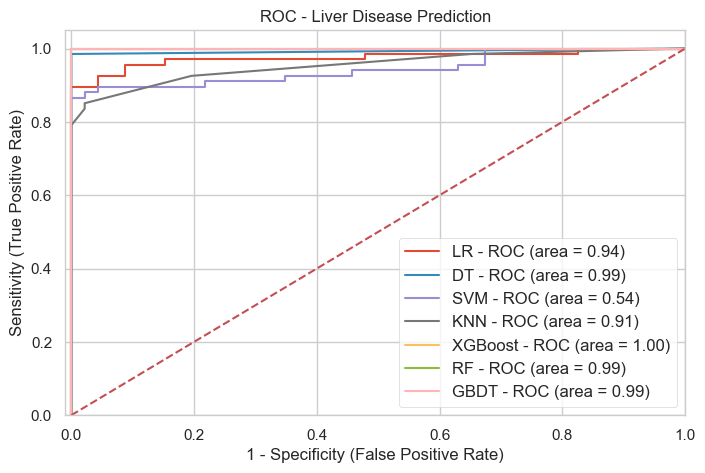

In [79]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("outputs/roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[92.92, 95.58, 62.83, 90.27, 100.0, 99.11999999999999, 99.11999999999999]
[np.float64(93.69), np.float64(94.44), np.float64(54.35), np.float64(91.45), np.float64(100.0), np.float64(98.50999999999999), np.float64(99.25)]


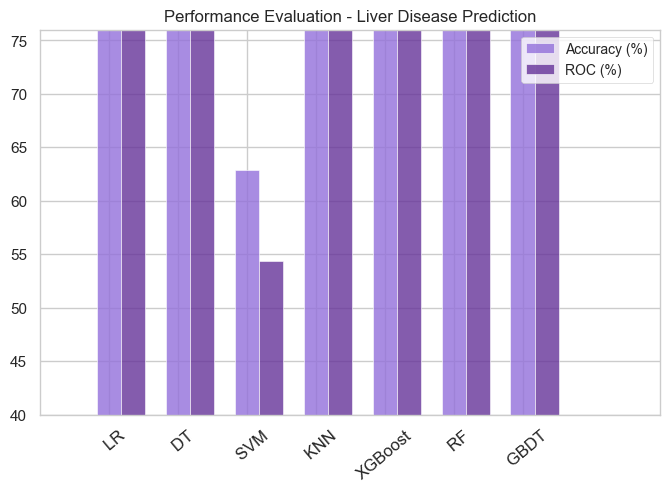

In [80]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(ran_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 76])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("outputs/PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()